In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv', delimiter=',')
data.sample(n=6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
305,36,No,Non-Travel,1105,Research & Development,24,4,Life Sciences,1,419,...,3,80,1,11,3,3,9,8,0,8
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7
1101,32,No,Travel_Rarely,824,Research & Development,5,2,Life Sciences,1,1555,...,1,80,1,12,2,3,7,1,2,5
587,52,No,Travel_Rarely,1325,Research & Development,11,4,Life Sciences,1,813,...,2,80,1,9,3,3,5,2,1,4
1420,41,No,Travel_Rarely,642,Research & Development,1,3,Life Sciences,1,1999,...,1,80,1,12,3,3,5,3,1,0
883,33,No,Travel_Rarely,117,Research & Development,9,3,Medical,1,1238,...,2,80,1,15,5,3,14,10,4,10


In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
data.shape

(1470, 35)

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
import pandas as pd

# Assuming df_old is your existing DataFrame and columns_to_keep is a list of column names you want to keep
columns_to_keep = ['DistanceFromHome', 'HourlyRate', 'Attrition']  # Replace with your desired column names

# Using loc to select columns by label
df_new = data.loc[:, columns_to_keep]

# Using iloc to select columns by integer position
# You can use df.columns.get_loc() to get the integer position of column names
column_positions = [data.columns.get_loc(col) for col in columns_to_keep]
df_new = data.iloc[:, column_positions]
df_new.isnull().sum()

DistanceFromHome    0
HourlyRate          0
Attrition           0
dtype: int64

In [7]:
df_new.head()

,DistanceFromHome,HourlyRate,Attrition
0,1,94,Yes
1,8,61,No
2,2,92,Yes
3,3,56,No
4,2,40,No


In [8]:
# Check the unique values in the 'Attrition' column
unique_values = df_new['Attrition'].unique()
print("Unique values in 'Attrition' column:", unique_values)

# Handle non-numeric values in the 'Attrition' column
# For example, if 'Attrition' contains 'Yes' and 'No', you can convert them to 1 and 0, respectively
df_new['Attrition'] = df_new['Attrition'].map({'Yes': 1, 'No': 0})

# Check if conversion was successful
print(df_new.dtypes)

Unique values in 'Attrition' column: ['Yes' 'No']
DistanceFromHome    int64
HourlyRate          int64
Attrition           int64
dtype: object


C:\Users\Alexander Michelsen\AppData\Local\Temp\ipykernel_5324\939398659.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Attrition'] = df_new['Attrition'].map({'Yes': 1, 'No': 0})


In [9]:
df_new.isnull().sum()

DistanceFromHome    0
HourlyRate          0
Attrition           0
dtype: int64

In [10]:
# Check for missing values
missing_values = df_new.isnull().sum()
print("Missing values:\n", missing_values)

# Check for infinite values
infinite_values = df_new[~np.isfinite(df_new)].sum()
print("Infinite values:\n", infinite_values)


Missing values:
 DistanceFromHome    0
HourlyRate          0
Attrition           0
dtype: int64
Infinite values:
 DistanceFromHome    0.0
HourlyRate          0.0
Attrition           0.0
dtype: float64


In [11]:
# Prepare the data
X = df_new.drop(columns=['Attrition'])  # Features
y = df_new['Attrition']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluate the Decision Tree model
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

# Evaluate the Naïve Bayes model
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, nb_predictions))

# Compare and select the best model based on accuracy or other evaluation metrics
if dt_accuracy > nb_accuracy:
    best_model = dt_classifier
    print("Decision Tree selected as the best model.")
else:
    best_model = nb_classifier
    print("Naïve Bayes selected as the best model.")

# Optionally, perform further validation or tuning steps

Decision Tree Accuracy: 0.7789115646258503
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.22      0.26      0.24        39

    accuracy                           0.78       294
   macro avg       0.55      0.56      0.55       294
weighted avg       0.79      0.78      0.79       294

Naïve Bayes Accuracy: 0.8673469387755102
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Naïve Bayes selected as the best model.


C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


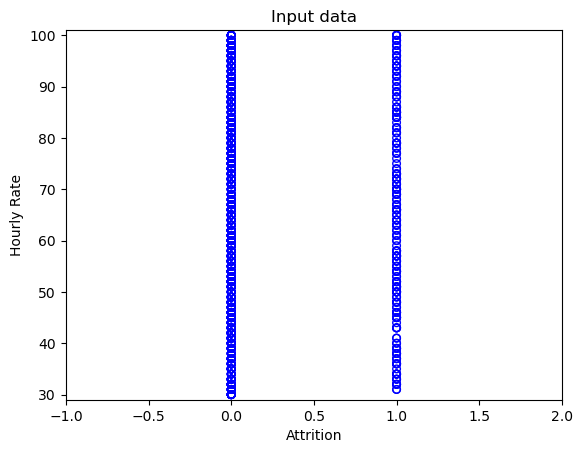

In [12]:
# Plot the input data
# a. creates figure
plt.figure()
plt.title('Input data')

# b. get the range of X and Y
# first column: Attrition
# second column: RelationshipSatisfaction
x_min, x_max = df_new['Attrition'].min(), df_new['Attrition'].max()
y_min, y_max = df_new['HourlyRate'].min(), df_new['HourlyRate'].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(df_new['Attrition'], df_new['HourlyRate'], marker='o', facecolors='none', edgecolors='blue', s=30)

plt.xlabel('Attrition')
plt.ylabel('Hourly Rate')

plt.show()


In [13]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(df_new)
    model.fit(df_new)
    distortions.append(sum(np.min(cdist(df_new, model.cluster_centers_, 'euclidean'), axis=1)) / df_new.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [11.86147658645864, 9.69530216329352, 8.702184675621744, 7.783904488879793, 6.779430092463621, 6.205731899969771, 5.725383853770903, 5.450053103640173]


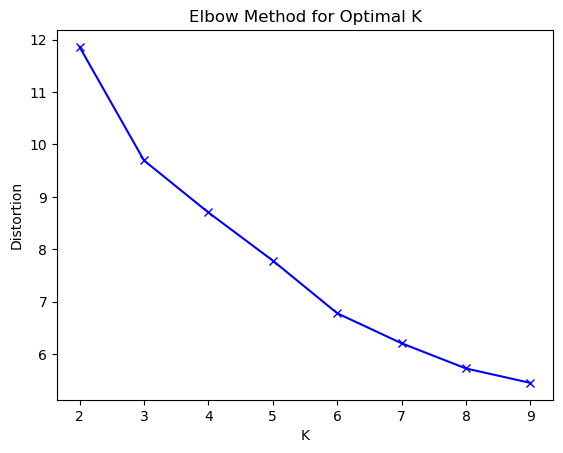

In [14]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [15]:
# Optimal number of clusters K
num_clusters = 7

In [16]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [17]:
kmeans.fit(df_new)

KMeans(n_clusters=7, n_init=20)

In [18]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.5318282802690022

Number of clusters = 3
Silhouette score = 0.42382496856198276

Number of clusters = 4
Silhouette score = 0.3617172566391186

Number of clusters = 5
Silhouette score = 0.42170411595562735

Number of clusters = 6
Silhouette score = 0.42185406329664105

Number of clusters = 7
Silhouette score = 0.4379146916218505

Number of clusters = 8
Silhouette score = 0.4092742976524751

Number of clusters = 9
Silhouette score = 0.4122536052774834


C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

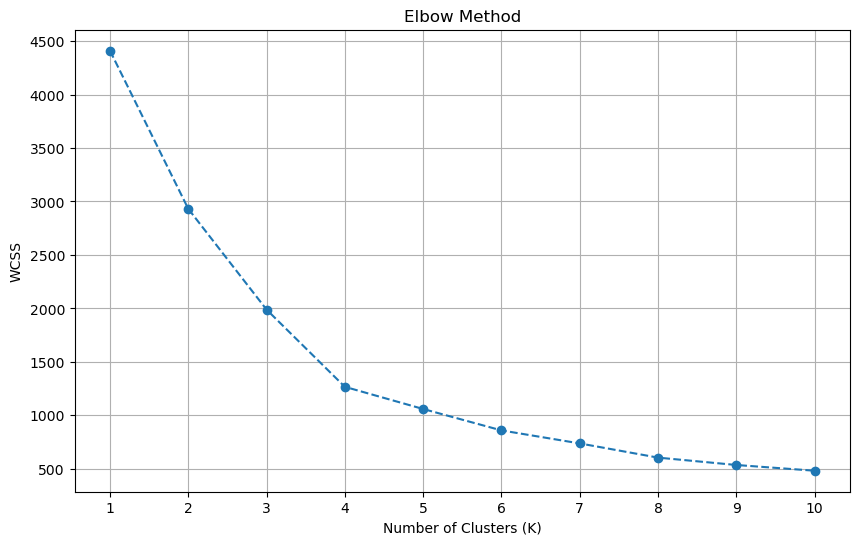

C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         DistanceFromHome  HourlyRate  Attrition
Cluster                                         
0               21.159509   83.914110        0.0
1                4.889262   41.305369        0.0
2                5.468750   65.787500        1.0
3                5.346278   64.067961        0.0
4               21.363636   65.129870        1.0
5                4.744745   88.009009        0.0
6               21.961538   47.907692        0.0


C:\Users\Alexander Michelsen\AppData\Local\Temp\ipykernel_5324\4078883378.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cluster'] = kmeans.labels_


In [21]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with relevant employee data

# Step 2: Feature Selection
columns_to_keep

# Step 3: Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new[columns_to_keep])

# Step 4: Choosing the Number of Clusters (K)
# Use the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (K)

# Step 5: Model Training
k = 7  # Example: choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

# Step 6: Cluster Assignment
df_new['Cluster'] = kmeans.labels_

# Step 7: Cluster Analysis
cluster_summary = df_new.groupby('Cluster')[columns_to_keep].mean()
print(cluster_summary)

# Step 8: Interpretation
# Analyze the characteristics of each cluster to derive insights and recommendations